# MyPCA.py
En este documento explicaré un poco como implementé mi propia versión de _PCA_. Para esta implementación traté de basarme en la implementación de `sklearn` (aunque no con tantas caracteristicas) y lo hice con el paradigma de OOP.

## Implementación
Solo utilicé `numpy` para mi implementación.
```python
import numpy as np
```

### Funciones auxiliares
#### _Z score_
Para estandarizar los datos decidí utilizar una función externa a la clase `PCA`, ya que (según yo entiendo) se pueden utilizar varios métodos para estandarizar los datos. Como se dice en el artículo de [Towards Datascience](https://towardsdatascience.com/understanding-pca-fae3e243731d):
> [...] (PCA is sensitive to the relative scale of your features — since all my features are daily stock returns I did not scale the data but in practice, you should consider using StandardScaler or MinMaxScaler).

Sin embargo ya que en el artículo de [Medium](https://medium.com/codex/principal-component-analysis-pca-how-it-works-mathematically-d5de4c7138e6) se explica _Z score_ decidí utilizar esa.
```python
def z_score(nd_array, axis=None):
    return (nd_array-np.mean(nd_array, axis=axis, keepdims=True))/np.std(nd_array, axis=axis, keepdims=True)
```

### Implementación de la clase
#### Atributos
```python
class PCA:
    # Attributes
    def __init__(self, n_components=False):
        self.n_components = n_components

    eigVal = None
    eigVec = None
    variance_ratio = None
```

#### Métodos
##### \_\_valid
El método privado `__valid` solo está para que la cantidad de componentes de _PCA_ siempre esté definido, aun si el usuario no lo hace por su cuenta.
```python
    def __valid(self, data):
        if self.n_components:
            pass
        else:
            self.n_components = min(data.shape)
```

##### fit
Este es el equivalente del `PCA.fit()` de `sklearn` y calcula los _Eigen vectors_, los _Eigen values_ y el _Variance ratio_ del conjunto de datos dado.
```python
    def fit(self, data, rowvar=False):
        self.__valid(data)
        matrix = np.cov(data, rowvar=rowvar)
        eVal, eVec = np.linalg.eigh(matrix)
        eVal, eVec = eVal[::-1], eVec[:,::-1]
        self.eigVal, self.eigVec = eVal[0:self.n_components], eVec[:,0:self.n_components]
        self.variance_ratio = self.eigVal/np.sum(self.eigVal)
```

##### transform
Por último este método tranforma los datos de entrada del método en la proyección resultante de _PCA_.
```python
    def transform(self, data, axis=1, rowvar=False):
        if self.variance_ratio.any():
            if axis == 0:
                mat = np.array([])
                for Evec in np.transpose(self.eigVec):
                    row = np.array([])
                    for Fvec in np.transpose(data):
                        row = np.append(row,np.dot(Evec,Fvec))
                    mat = np.append(mat, -row)
                return mat.reshape((int(mat.shape[0]/self.n_components),self.n_components))
            elif axis == 1:
                mat = np.array([])
                for Evec in np.transpose(self.eigVec):
                    row = np.array([])
                    for Fvec in data:
                        row = np.append(row,np.dot(Evec,Fvec))
                    mat = np.append(mat, -row)
                return mat.reshape((int(mat.shape[0]/self.n_components),self.n_components))
            else:
                raise Exception("axis option must be 0 or 1")
        else:
            raise Exception("The model must be fitted first")
```

# Testeo
Voy a realizar _PCA_ sobre los datos _Iris_ de `sklearn`.

## Código compartido

Primero vamos a cargar los paquetes estandar (`numpy`, `matplotlib.pyplot` y `sklearn.datasets`).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

Ahora vamos a importar los datos.

In [2]:
iris       = load_iris()
x          = iris['data']
train_data = x[:100]
test_data  = x[100:]

### Mi propia implementación

In [3]:
from MyPCA import z_score
from MyPCA import PCA as PCA_p

Instancia de la clase y ajuste del modelo.

In [4]:
p_pca = PCA_p(n_components = 2)
p_pca.fit(z_score(train_data, axis=0))

Obtenemos los resultados.

In [5]:
p_result  = p_pca.transform(z_score(test_data, axis=0))

Graficamos los resultados

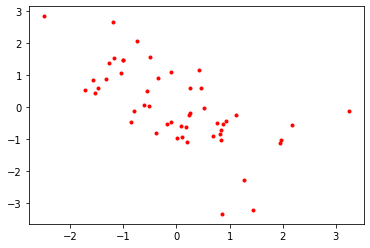

In [6]:
p_fig = plt.figure()
p_ax = p_fig.add_subplot(111)

p_ax.scatter(p_result[:,0], p_result[:,1], c='r', marker='.');

### La implementación de `sklearn`

In [7]:
from sklearn.decomposition import PCA

Instancia de la clase y ajuste del modelo.

In [8]:
sk_pca = PCA(n_components = 2)
sk_pca.fit(z_score(train_data, axis=0));

Obtenemos los resultados.

In [9]:
sk_result = sk_pca.transform(z_score(test_data, axis=0))

Graficamos los resultados.

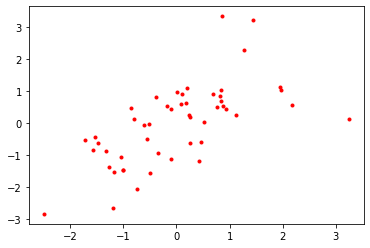

In [10]:
sk_fig = plt.figure()
sk_ax = sk_fig.add_subplot(111)

sk_ax.scatter(sk_result[:,0], sk_result[:,1], c='r', marker='.');

### Resultados